In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_all=pd.read_excel("orders-2018 v2.xlsx", "orders-2018")

In [4]:
df_all.head()

,Номер заказа,id клиента,Дата заказа,Сумма заказа
0,200389,2357,2018-01-02,7541
1,200390,2357,2018-01-02,32761
2,200392,1139,2018-01-02,11237
3,200393,2026,2018-01-02,12503
4,200394,2026,2018-01-02,1530


In [5]:
df_all["Дата заказа"] = pd.to_datetime(df_all['Дата заказа'],format='%Y-%m-%d')

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12907 entries, 0 to 12906
Data columns (total 4 columns):
Номер заказа    12907 non-null int64
id клиента      12907 non-null int64
Дата заказа     12907 non-null datetime64[ns]
Сумма заказа    12907 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 403.5 KB


In [42]:
df_all.describe().round(1)

,Номер заказа,id клиента,Сумма заказа
count,12907.0,12907.0,12907.0
mean,210519.7,1632.9,14201.8
std,5750.5,787.9,23415.4
min,200389.0,1.0,0.0
25%,205468.5,1013.0,7019.5
50%,210629.0,1920.0,10362.0
75%,215593.0,2097.0,17361.5
max,220297.0,2907.0,2089579.0


In [7]:
df1=df_all
df1.index = df1['Дата заказа'] 
df1=df1.resample('M').sum().reset_index()
month = ['January-18',
'February-18',
'March-18',
'April-18',
'May-18',
'June-18',
'July-18',
'August-18',
'September-18',
'October-18',
'November-18',
'December-18',
'January-19',
'February-19']
df1['Месяц'] = month
df1

,Дата заказа,Номер заказа,id клиента,Сумма заказа,Месяц
0,2018-01-31,129620021,1131461,8307486,January-18
1,2018-02-28,145298920,1299517,8879162,February-18
2,2018-03-31,144281552,1242223,9117533,March-18
3,2018-04-30,137028434,1157006,8679254,April-18
4,2018-05-31,140814889,1146421,8963606,May-18
5,2018-06-30,151000172,1234355,9092893,June-18
6,2018-07-31,152074723,1229740,9275875,July-18
7,2018-08-31,181711517,1404755,11409916,August-18
8,2018-09-30,171946156,1322471,11592098,September-18
9,2018-10-31,190559349,1473358,12881106,October-18


[Text(0, 0, 'January-18'),
 Text(0, 0, 'February-18'),
 Text(0, 0, 'March-18'),
 Text(0, 0, 'April-18'),
 Text(0, 0, 'May-18'),
 Text(0, 0, 'June-18'),
 Text(0, 0, 'July-18'),
 Text(0, 0, 'August-18'),
 Text(0, 0, 'September-18'),
 Text(0, 0, 'October-18'),
 Text(0, 0, 'November-18'),
 Text(0, 0, 'December-18'),
 Text(0, 0, 'January-19'),
 Text(0, 0, 'February-19')]

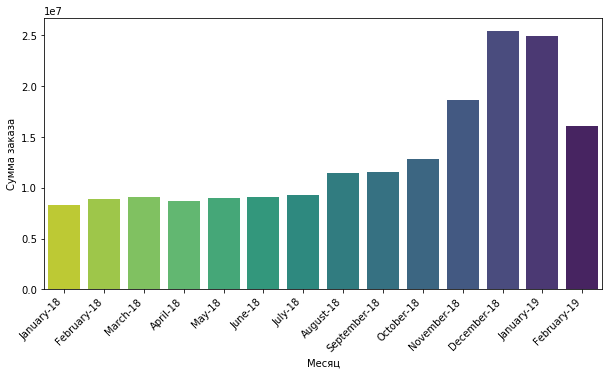

In [8]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x="Месяц", y="Сумма заказа", data=df1, palette="viridis_r")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

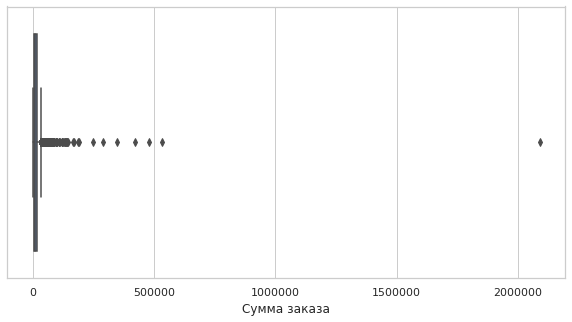

In [9]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_all["Сумма заказа"])

In [10]:
df_all.groupby('id клиента')['Сумма заказа'].count().sort_values(ascending=False).head(10)

id клиента
2026    2381
2357     353
5        117
1913      98
1927      94
2778      87
939       86
2071      79
2674      63
491       63
Name: Сумма заказа, dtype: int64

In [11]:
df_all.groupby('id клиента')['Сумма заказа'].sum().sort_values(ascending=False).head(10)

id клиента
2026    28281078
2357     3829598
2765     2855390
2632     2211369
659      1457998
1475     1067490
1277      996571
1846      975149
1913      955112
2097      922951
Name: Сумма заказа, dtype: int64

In [12]:
df=df_all[(df_all['Сумма заказа'] != 0) & (df_all['Сумма заказа']!=2089579.0)]
df=df[(df['id клиента'] != 2026) & (df['id клиента']!=2357)]
df

,Номер заказа,id клиента,Дата заказа,Сумма заказа
Дата заказа,,,,
2018-01-02,200392,1139,2018-01-02,11237
2018-01-02,200396,2416,2018-01-02,31835
2018-01-02,200400,1962,2018-01-02,33788
2018-01-03,200406,2742,2018-01-03,6147
2018-01-03,200407,2071,2018-01-03,8400
2018-01-03,200408,1117,2018-01-03,36404
2018-01-03,200412,2778,2018-01-03,5185
2018-01-03,200415,1655,2018-01-03,3222
2018-01-07,200554,1765,2018-01-07,33875


In [13]:
df=df.reset_index(drop=True)
df_temp=pd.pivot_table(df,index=["Дата заказа", "id клиента"],aggfunc=np.sum)
df_temp

Номер заказа  Сумма заказа
Дата заказа id клиента                            
2018-01-02  1139              200392         11237
            1962              200400         33788
            2416              200396         31835
2018-01-03  255               200443         15164
            766               200441         10920
...                              ...           ...
2019-02-17  2806              220278         34103
            2828              220289         38920
            2830              220283         13183
            2835              220261          7452
            2843              220281          9976

[9819 rows x 2 columns]

In [14]:
df=df_temp.reset_index()

In [15]:
#count 
df.groupby('id клиента').cumcount()
df['occurences'] = df.groupby('id клиента').cumcount()
df.head()

,Дата заказа,id клиента,Номер заказа,Сумма заказа,occurences
0,2018-01-02,1139,200392,11237,0
1,2018-01-02,1962,200400,33788,0
2,2018-01-02,2416,200396,31835,0
3,2018-01-03,255,200443,15164,0
4,2018-01-03,766,200441,10920,0


In [16]:
#first orders in last 180 Days
df_first_180days=df[(df['Дата заказа'] > '2018-08-01') & (df['occurences']==0)]


#second orders in last 180 Days
df_second_180days=df[(df['Дата заказа'] > '2018-08-01') & (df['occurences']==1)]

In [1]:
#print(df_second_180days.to_string())

In [18]:
df_first_180days.describe().round(1)

,id клиента,Номер заказа,Сумма заказа,occurences
count,1943.0,1943.0,1943.0,1943.0
mean,1428.1,219997.7,14466.9,0.0
std,841.5,37934.5,15933.5,0.0
min,1.0,208203.0,98.0,0.0
25%,679.5,211560.5,7071.5,0.0
50%,1432.0,215150.0,10340.0,0.0
75%,2165.5,217811.0,17791.0,0.0
max,2907.0,841195.0,422137.0,0.0


In [19]:
df_first_180days.sort_values('Сумма заказа', ascending=False).head(10)

,Дата заказа,id клиента,Номер заказа,Сумма заказа,occurences
4399,2018-09-24,645,210573,422137,0
7355,2018-12-30,2117,216345,141757,0
6591,2018-12-12,911,214993,139250,0
7937,2019-01-15,1221,217273,132600,0
7262,2018-12-29,501,648835,117152,0
3676,2018-08-19,1825,627131,110340,0
6114,2018-11-29,1600,428328,99274,0
4548,2018-10-02,1071,210875,94880,0
7278,2018-12-29,1141,648900,89996,0
5853,2018-11-21,1159,213608,86777,0


In [20]:
#y - first order, x - second order
ordered_second_time=pd.merge(df_second_180days, df_first_180days, on='id клиента', how='inner')
ordered_second_time=ordered_second_time.rename(columns={"Сумма заказа_y": "Сумма 1 заказа", 'Сумма заказа_x': 'Сумма 2 заказа'})
ordered_second_time.head(5)

,Дата заказа_x,id клиента,Номер заказа_x,Сумма 2 заказа,occurences_x,Дата заказа_y,Номер заказа_y,Сумма 1 заказа,occurences_y
0,2018-08-05,358,208315,6314,1,2018-08-02,208241,5053,0
1,2018-08-05,2464,208318,13364,1,2018-08-02,208203,7390,0
2,2018-08-07,1102,208446,8205,1,2018-08-06,208366,11636,0
3,2018-08-07,1108,208423,936,1,2018-08-06,208349,8692,0
4,2018-08-10,1490,208628,15251,1,2018-08-09,208560,8929,0


In [21]:
ordered_second_time['Perc_change'] = ((ordered_second_time['Сумма 2 заказа'] / ordered_second_time['Сумма 1 заказа']) -1).round(3)
ordered_second_time['Sum'] = ((ordered_second_time['Сумма 2 заказа'] + ordered_second_time['Сумма 1 заказа'])).round(3)

ordered_second_time.head(5)

,Дата заказа_x,id клиента,Номер заказа_x,Сумма 2 заказа,occurences_x,Дата заказа_y,Номер заказа_y,Сумма 1 заказа,occurences_y,Perc_change,Sum
0,2018-08-05,358,208315,6314,1,2018-08-02,208241,5053,0,0.250,11367
1,2018-08-05,2464,208318,13364,1,2018-08-02,208203,7390,0,0.808,20754
2,2018-08-07,1102,208446,8205,1,2018-08-06,208366,11636,0,-0.295,19841
3,2018-08-07,1108,208423,936,1,2018-08-06,208349,8692,0,-0.892,9628
4,2018-08-10,1490,208628,15251,1,2018-08-09,208560,8929,0,0.708,24180


In [22]:
ordered_second_time.sort_values('Perc_change', ascending=False).head(5)

,Дата заказа_x,id клиента,Номер заказа_x,Сумма 2 заказа,occurences_x,Дата заказа_y,Номер заказа_y,Сумма 1 заказа,occurences_y,Perc_change,Sum
303,2018-12-07,1330,214646,136240,1,2018-12-03,214376,5250,0,24.950,141490
597,2019-02-05,294,218964,9720,1,2019-01-23,217877,571,0,16.023,10291
119,2018-10-17,1542,211543,27566,1,2018-10-16,211505,1690,0,15.311,29256
300,2018-12-06,2445,214634,42059,1,2018-08-09,208609,3750,0,10.216,45809
112,2018-10-15,1572,211464,58520,1,2018-09-14,210251,5342,0,9.955,63862


In [23]:
bins = pd.cut(ordered_second_time['Сумма 2 заказа'], [0, 1000, 2000, 3000, 4000, 5000, 6999, 8000, 10000, 20000, 30000, 40000, 130000, 500000])

In [24]:
ordered_second_time.groupby(bins)['Сумма 2 заказа'].agg(['count', 'sum'])

,count,sum
Сумма 2 заказа,,
"(0, 1000]",2,1470
"(1000, 2000]",11,15053
"(2000, 3000]",14,34224
"(3000, 4000]",12,42646
"(4000, 5000]",19,84498
"(5000, 6999]",38,229122
"(6999, 8000]",92,682916
"(8000, 10000]",100,892506
"(10000, 20000]",266,3755856


Text(5000, -12, '7000')

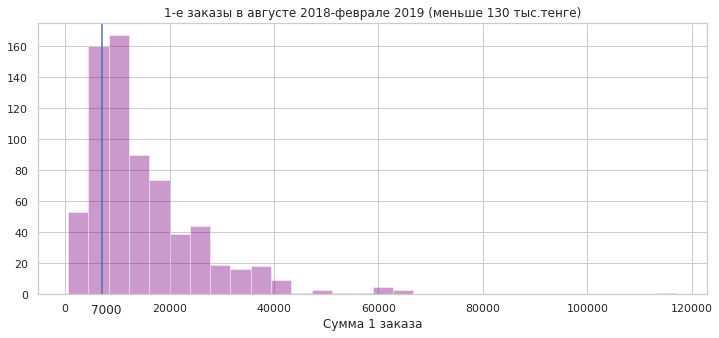

In [25]:
hist=ordered_second_time[(ordered_second_time['Сумма 1 заказа'] < 130000)]
plt.figure(figsize=(12,5))
sns.distplot(hist['Сумма 1 заказа'], kde=False, color='purple', bins=30)
plt.title('1-е заказы в августе 2018-феврале 2019 (меньше 130 тыс.тенге)')
plt.axvline(7000)

plt.text(5000,-12,'7000')


Text(5000, -12, '7000')

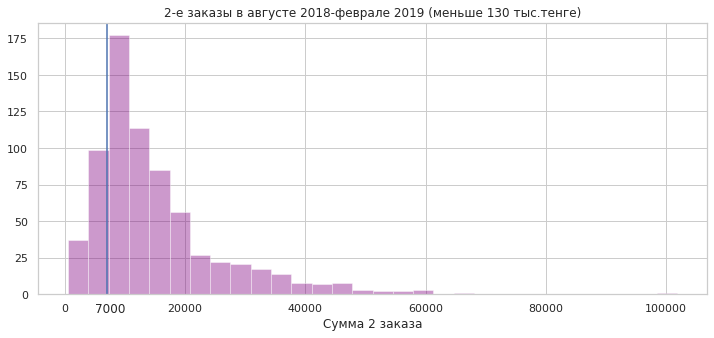

In [26]:
hist=ordered_second_time[(ordered_second_time['Сумма 2 заказа'] < 130000)]
plt.figure(figsize=(12,5))
sns.distplot(hist['Сумма 2 заказа'], kde=False, color='purple', bins=30)
plt.title('2-е заказы в августе 2018-феврале 2019 (меньше 130 тыс.тенге)')
plt.axvline(7000)

plt.text(5000,-12,'7000')

In [27]:
NOW = dt.datetime(2019,2,18)
rfmTable = df.groupby('id клиента').agg({'Дата заказа': lambda x: (NOW - x.max()).days, 'Номер заказа': lambda x: len(x), 'Сумма заказа': lambda x: x.sum()})
rfmTable['Дата заказа'] = rfmTable['Дата заказа'].astype(int)
rfmTable.rename(columns={'Дата заказа': 'recency', 
                         'Номер заказа': 'frequency', 
                         'Сумма заказа': 'monetary_value'}, inplace=True)

In [28]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [29]:
segmented_rfm = rfmTable

In [30]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [31]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
id клиента,,,,,,,
1,29,1,24257,2,4,2,242
2,5,1,3870,1,4,4,144
3,3,1,9324,1,4,3,143
4,2,5,49714,1,1,1,111
5,2,116,857455,1,1,1,111


In [32]:
segmented_rfm2=segmented_rfm.reset_index()

In [33]:
onetime=segmented_rfm2[(segmented_rfm2['frequency']==1) & (segmented_rfm2['recency']<=200)].sort_values('monetary_value', ascending=False)
onetime=onetime[(segmented_rfm2['recency']>48)].sort_values('recency', ascending=False)
onetime

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id клиента,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
1023,1024,199,1,936,4,4,4,444
547,548,199,1,13129,4,4,3,443
1706,1707,199,1,188,4,4,4,444
2324,2327,199,1,7491,4,4,4,444
887,888,198,1,15398,4,4,3,443
1698,1699,198,1,12926,4,4,3,443
1610,1611,197,1,2034,4,4,4,444
2278,2281,197,1,7020,4,4,4,444
1393,1394,197,1,4344,4,4,4,444
1588,1589,196,1,30656,4,4,2,442


In [34]:
bins = pd.cut(onetime['monetary_value'], [0, 1000, 2000, 3000, 4000, 5000, 6999, 8000, 10000, 20000, 30000, 40000, 140000])

In [35]:
onetime.groupby(bins)['monetary_value'].agg(['count', 'sum'])

,count,sum
monetary_value,,
"(0, 1000]",14,9141
"(1000, 2000]",24,37943
"(2000, 3000]",28,70823
"(3000, 4000]",33,120841
"(4000, 5000]",30,133728
"(5000, 6999]",47,277238
"(6999, 8000]",75,553427
"(8000, 10000]",80,712041
"(10000, 20000]",212,3011533


Text(5000, -15, '7000')

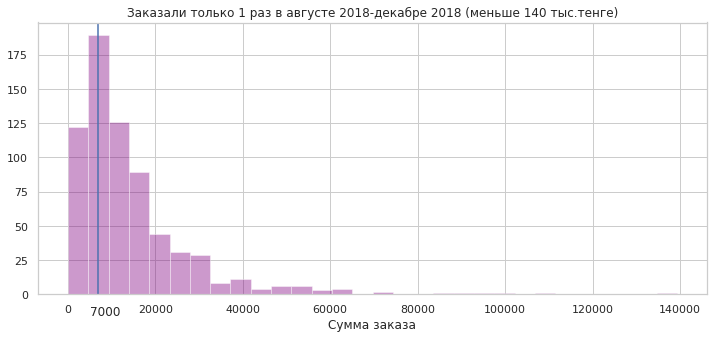

In [40]:
hist=onetime[(onetime['monetary_value'] < 140000)]
plt.figure(figsize=(12,5))
sns.distplot(hist['monetary_value'], kde=False, color='purple', bins=30, axlabel="Сумма заказа")
plt.title('Заказали только 1 раз в августе 2018-декабре 2018 (меньше 140 тыс.тенге)')
plt.axvline(7000)

plt.text(5000,-15,'7000')